In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [72]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                 header=None)

In [73]:
le = LabelEncoder()

In [74]:
X = df.loc[:,2:].values
y = df.loc[:,1].values
y = le.fit_transform(y)
print(le.classes_)

['B' 'M']


In [5]:
le.transform(['B', 'M'])

array([0, 1])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1) 
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Fine tuning machine learning models via - Grid Search

- IN Machine learning we have __two types of parameters__, those that are __learned form the training data__, for example, the weights in logistic regression, __and the parameters of a learning algorithm__ that are optimised separetely, The latter are the tuning paremeters, also called __hyperparameters__, of a model. 



### Tuning hyperparameters via grid search

- The approach of grid search is quite simple; it's a __brute-force exhaustive search paradigm__ where we specify a list- of values for different hyperparameters, and the __computer evaluates the models performance for each combination__ of those to obtain the optimal combination of values from this set: 


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

In [10]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0 , 100.0 ,1000.0]
param_grid = [{'svc__C':param_range, 'svc__kernel':['linear']},
               {'svc__C':param_range, 'svc__kernel':['rbf'], 'svc__gamma':param_range}]

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10)

gs = gs.fit(X_train,y_train)
print('Best accuracy : ', gs.best_score_)
print(gs.best_params_)

Best accuracy :  0.984615384615
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [11]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0 , 100.0 ,1000.0]
param_grid = [{'svc__C':param_range, 'svc__kernel':['linear']},
               {'svc__C':param_range, 'svc__kernel':['rbf'], 'svc__gamma':param_range}]

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='average_precision',
                 cv=10)

gs = gs.fit(X_train,y_train)
print('Best average Precision : ', gs.best_score_)
print(gs.best_params_)

Best average Precision :  0.99667969752
{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


- After we used the training data to perform the grid search, we obtained the score of the best-performing model via the _best_score_ attributeand looked at its parameters that can be accessed via the _best_params_ atribute.

- Finally, we will use the independent test datase to estimate the performance of the best-selected model, which is availabe via the _best_estimate_ attribute of the __GridSearchCV__.

In [12]:
clf = gs.best_estimator_

clf.fit(X_train, y_trainT
print('Test accuracy %.3f' %clf.score(X_test, y_test))

SyntaxError: invalid syntax (<ipython-input-12-99a0e53f5960>, line 4)

In [ ]:
clf.fit(X_train, y_train)
print('Test accuracy %.3f' %clf.score(X_test, y_test))

- Although Grid Search is a powerful approach for finding the optimal set of parameters. The __evaluation of all possible parameter combinations is also computationally very expendisve.__
- An alternative approach to sampling different parmeterr combinatios usign sklearn is __[randomized search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) random parameter combinatios__ from sampling distributions with a __specfied budget.__

### Algorithm selection with nested cross-validation

- If we want to select among different machine learning algorithms, another recommended approach is nested cross-validation.
 In a study on the bias of error estimate by Varma and Simon concluded that the true error of the estimate is almost unbiased relative to the test set when nested cross-validation is used.

In nested cross-validation , we have an outer k-fold cross-validation loop to split the data into training and test folds, and an inner loop is used to select the model using k-fold cross-validation on the training fold. After model selction , the test fold is then used to evaluate the model performance. The follwoing figure explains the concept of nested cross-valdation with only five outer and two inner folds, which can be useful for large datsets where computational peformance is important; this particular type of nested cross-validation is also known as __5x2 cross-validation.__

![nested-cv.png](nested-cv.png)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#  Nested Grid Search Support vector Machine
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy',cv=5)

print('CV accuracy %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

In [ ]:
#  Nested Grid Search Decision Tree

gs = GridSearchCV(estimator=DecisionTreeClassifier(),
                 param_grid= [{'max_depth':[11,2,3,4,5,6,7,None]}],
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy',cv=5)
print('CV accuracy %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

As we can see, the nested cross-validation of the SVM model (97.4) is notably better than the performance of the dcision dtree(93.8) and thus, we'd expect that it might be thte better choice to classify new data that comes form the same population as this paritcular datset.


### Different Evaluation metrics

- There are several performance metrices which can be used to measure a model's relevance, such as -
__ precision, recall, accuracy and the F1-score.__

### Reading a Confusion Matrix

__Confusion matrix :__  a matrix that lays out the perfromance of a learning algorithm. The confusion matrix is simply a square matreix that reports the counts of the __True Positive(TP), True Negative (TN), False Positive(FP) and False Negative (FN)__.

![confusion_matrix.png](confusion_matrix.png)

In [15]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)



In [18]:
confmat = confusion_matrix(y_pred=y_pred, y_true=y_test)
print(confmat)

[[71  1]
 [ 2 40]]


- We can map this information onto the confusion matrix illustration using __matshow__ function

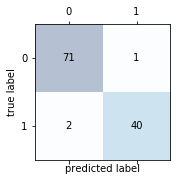

In [26]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

### Optimizing the precion and recall of a classificaiton model

Both the prediction __error (ERR) __ and __accuracy (ACC)__ provides general information about how many samples are misclassified.
<center>ERR = $\frac{FP+FN}{FP+FN+TP+TN}$<center/>
<center>ACC = $\frac{TP+TN}{FP+FN+TP+TN}$ = 1- ERR<center/>

- The __True Positive rate (TPR)__ and __Flase Positve rate(FPR)__ are performance metries that are especially useful for imbalanced classs problems:
<center>FPR = $\frac{FP}{FP+TN}$<center/>
<center>TPR = $\frac{TP}{FN+TP}$<center/>

- The performance metrices __precision (PRE)__ and __ recall (REC)__ are related to those true positive rate and negative restes, and in fact, REC is synonymous with TPR:
<center>PRE = $\frac{TP}{FP+TP}$<center/>
<center>REC = TPR = $\frac{TP}{P} = \frac{TP}{FN+TP}$<center/>

- in practive, often a combinationon of __PRE__ and __REC__ is used, the so-called __F1-score__:
<center>F1= 2$\frac{PRE * REC}{PRE+REC}$<center/>


The scoring metrices are all implemeted in scikt-learn and can be imported from _sklearn.metrics_ modules as shown in the following snippet:


In [27]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

In [28]:
print('Precision: %.3f' %precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' %recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' %f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


- __Note:__ Furthuremore, we can use a different scoring metric than accuracy in the _GridSearchCV_ via the scoring parameter. A complete of the different values that are accepted by the scoring parameter can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html)

Remember that the __positive class in scikit-learn is the class that is labeled as class 1__. If we want to specify a different positive label we can construct our own scorer via _make\_scorer_ funciton , which we can then directly provide as an argument to the scoring parameter in _GridSearchCV_:

In [30]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)

In [31]:
gs = GridSearchCV(pipe_svc,
                 param_grid=param_grid,
                 scoring=scorer,
                 cv=10)

In [32]:
gs= gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.988021913796
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


### Plotting a receiver operating characterisitic
Receiver Operating Characteristic (ROC) graphs are usefful tools to select modes for classifcation based on theier performance with respect tot he FPR  and TPR, which are computed by shifting the decision threshold of the classifier. the dagonal of an ROC graph can be interpeted as _random guessing_, and classification models that fall below the diagonal are considered as worse than randomguessing, A perfect classifier would fall into the top left corner of the graph with a TPR of 1 and an FPR of 0. Based on the ROC  curve, we can then compurte the so-called __ROC Area Under the Curve (ROC AUC) __ to characterize the performance of a classification model.

Similar to ROC curves, we can ompute __precision-recall curves __ for differenct probability thresholds of a classifier. A function for plotting those precion-recall curves is also implemented in scikit-learn.

In [42]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold

In [41]:
pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                          LogisticRegression(penalty='l2',random_state=1, C=100.0))

In [ ]:
X_train2 = X_train[:,[4,14]]

In [47]:
cv = list(StratifiedKFold(y_train,n_folds=3, random_state=1))#.split(X_train,y_train))

In [49]:
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr= []

In [50]:
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                    probas[:,1],
                                    pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(tpr, fpr)
    plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' %(i+1, roc_auc))
    

In [51]:
plt.plot([0,1],[0,1],linestyle='--', color=(0.6,0.6,0.6), label='random guessing')

In [52]:
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',label='mean ROC (area = %0.2f)' %mean_auc, lw=2)
plt.plot([0,0,1],[0,1,1], linestyle=':',color='black',label='pefect performance')

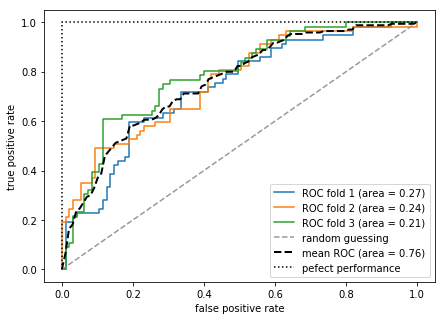

In [53]:
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In the preceding code example, we used the already familiar _StratifiedKFold_ class form scikit-learn and calculated the ROC performance of the _LogisticRegression_ classifier in our _pipe-lr_ pipeline using the _roc-curve_ fromction form the sklearn.metris module separately fore each iteration. Furthuremore, we interpolated the average ROC curve form the threee ffolds via the _interp_ function that we imported form SciPy and calcuated teh areas udner the curve via the _auc_ function . The resulting ROC  curve indicates that there is a certaing degree of variance btween the differnet folds, and the avearage ROC AUC (0.76) falss between a perfect score (1.0) and random guessing(0.5)

- Now if we are just intersted in the ROC AUC score, we could also directly imor the roc_auc_score functin form sklearn.metrics submodule.

Reporting the performance of a classifier as the ROC AUC can yield further insights in a classifier's perfromance with respect to imbalanced samples. However, while the accuracy score can be interpreted as a single cut-off point on an ROC curve, A.P.Bardley showed that the ROC AUC and accuracy metircs mostly agree with each other.

### Scoring metrics for multiclass classification

Scikit-learn also implements macro and micro average methods fto those (binary classification scoring metrices) scoring metrics to multiclass problems via __One-versus-All (OvA)__ classification. </br>
- The __micro-average__ is calculated form the individual TPs, TNs, FPs and FNs of the system. For example, the micro-average of the precision score in a k-class system can be calculated as follows.

<center>$PRE_{micro} = \frac{TP_1 + ... + TP_k}{FP1+...+FP_k+TP_1+...+TP_k}$</center></br>

- The __macro-average__ is simply calculated as the average scores of the different systems:

<center>$PRE_{macro} = \frac{PRE_1 + ... + PRE_k}{k}$</center>


__Micro-averaging __ is useful if we want to __weight each instacne or prediciton equally,__ whereas
__macro-averaging__ is __weighs all classes equally to evaluate the overall performance__ of a classifier with regard tot he most frequesnt class labels

If we are using binary performance metrics to evaluate multiclass classificaiton models in scikit-learn , a normalized or weighted variant of the macro-average is used by default. The weighted macro-average is calcuated by weighting the score of each class label by the number of true instance when calcuating the average. The weighted macro-average is useful if we are dealing with class imbalances, that is, different numbers of instances for each label.
- While the weighted macro-average is the default for multiclass problems in scikit-learn, we can specify the averaging method via the average parameter inside the different scoring functions that we import from the _sklearn.metrics_ modules for example , the _precision-score_ or _make-scorer_ functions:

In [54]:
pre_scorer = make_scorer(score_func=precision_score,
                        pos_label=1,
                        greater_is_better=True,
                        average='micro')

### Dealing with class imbalance
Samples from one class or multiple classes are over-represented in a dataset. This may occur such as spam filterning, fraud detection , or screening for diseases.

In [75]:
# let's create an imblanced datsef rom our breast cancer datset

X_imb = np.vstack((X[y==0], X[y==1][:40]))


y_imb = np.hstack((y[y==0], y[y==1][:40]))

In the previous code snipped, we took all 357 benign tumor samples and stacked them with the first 40 malignant samples to create a stark calss imbalace, I we to compute the accuracy of a model that always predicts the majority class(benign class 0), wwe would achive a prdiction accuracy of aproxximately 90 percent.

In [78]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb)*100


89.924433249370267

Thus, when we fit classifiers on such dataset, it would make sense to __focus on other metrics than acuray when comparing differnet models, such as precision , recal the ROC curve-__ whatever ewe care most about in our application. For instance if our priority might be tto identf the __majority of patients with mlaignant cance pateints to recommend an additional screening, then recall__ should be our metirc off choice. In spam filterning, wehre we don't want to lable emails as spam in the system in our very certain, preciision might be a more appropriate metric.

- Class imbalacne also influence a machine learning algirith during model fitting iteself. Algorithm implicity learn as model that optimizes the precictions based on the most abundant class in the datset, inorder to minimize the cost or maximize the reward during training, since ML algorithms typically optimize a reward or cost function that is computed as a sum over the triaining examples.
- __one way __ to deal with imlanced class proportins during __model fitting is to assign a larger penalyt to wriong predicitons on the minority class,__Via _sklearn_ class_weight_parameter to 'balanced'implemented in most classifiers.
- Other populart stratergies for dealing with class imbalance include upsampling the minooryt class, downsampling the mahority class and the generation of synthetic training samples (SMOTE). The sklearn library implements a simple _resample_ funciton that can help with the upsampling of the minority class by drqwing new samples form the dataset with replacement.

In [80]:
from sklearn.utils import resample
print('Number of class 1 samples before:', X_imb[y_imb==1].shape[0])

Number of class 1smaples before: 40


In [81]:
X_upsampled, y_upsampled = resample(X_imb[y_imb==1],
                                   y_imb[y_imb==1],
                                   replace=True,
                                   n_samples=X_imb[y_imb==0].shape[0],
                                   random_state=123)
print('Number of class 1samples after:', X_upsampled.shape[0])

Number of class 1samples after: 357


After resmpling we can then stack the origncla class 0 samples with the upsampled class 1 subset to obtain a balanced dataset as follows:

In [82]:
X_bal = np.vstack((X[y==0], X_upsampled))
y_bal = np.hstack((y[y==0], y_upsampled))

Consequently, a majority vote prediction rrule would only achieve 50 percent accuracy

In [83]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred==y_bal)*100

50.0

Similary, we can downsample the majority class by remove trainig examples form the dataset. 
- The most widely used algorithm for synthetic training sample generation is __Synthetiet Minotiy Over Sampling Technique (SMOTE)__. 
- It is highly recommended to learn about _imbalance-learn_, a PYTHON library that is entierly focused on imbalanced datasets, including an implementation of SMOTE.